In [1]:
#De acordo com o CDC é uma das doenças que mais matam no mundo, incluindo Estados Unidos e Brasil. A metade dos americanos (47%) tem pelo menos 1 dos 3 fatores de risco associados a doenças cardíacas: pressão alta, alto colesterol e é fumante. Outros fatos são diabete, obesidade (alto BMI), falta de exercício físico regular e muito consumo de alcool.

#HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
#2. BMI : Body Mass Index (BMI).
#3. Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
#4. AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
#5. Stroke (AVC): (Ever told) (you had) a stroke?
#6. PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
#7. MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
#8. DiffWalking : Do you have serious difficulty walking or climbing stairs?
#9. Sex : Are you male or female?
#10. AgeCategory: Fourteen-level age category.
#11. Race : Imputed race/ethnicity value.
#12. Diabetic : (Ever told) (you had) diabetes?
#13. PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
#14. GenHealth : Would you say that in general your health is...
#15. SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
#16. Asthma : (Ever told) (you had) asthma?
#17. KidneyDisease (Doenças Renais): Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
#18. SkinCancer : (Ever told) (you had) skin cancer?

#importando as bibliotecas
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [3]:
#lendo os datasets
df = pd.read_csv('risco_cardiaco.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
#Descrevendo as features numéricas
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})
df.info()
#319795 casos com 18 colunas. Nenhuma coluna Nula. 14 métricas numéricas, 4 categóricas


In [4]:
#verificando valores únicos. Alguns atributos tem mais de dois valores únicos. Vamos usar OneHotEncoder para processar os dados e normalizá-los
df.nunique()
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

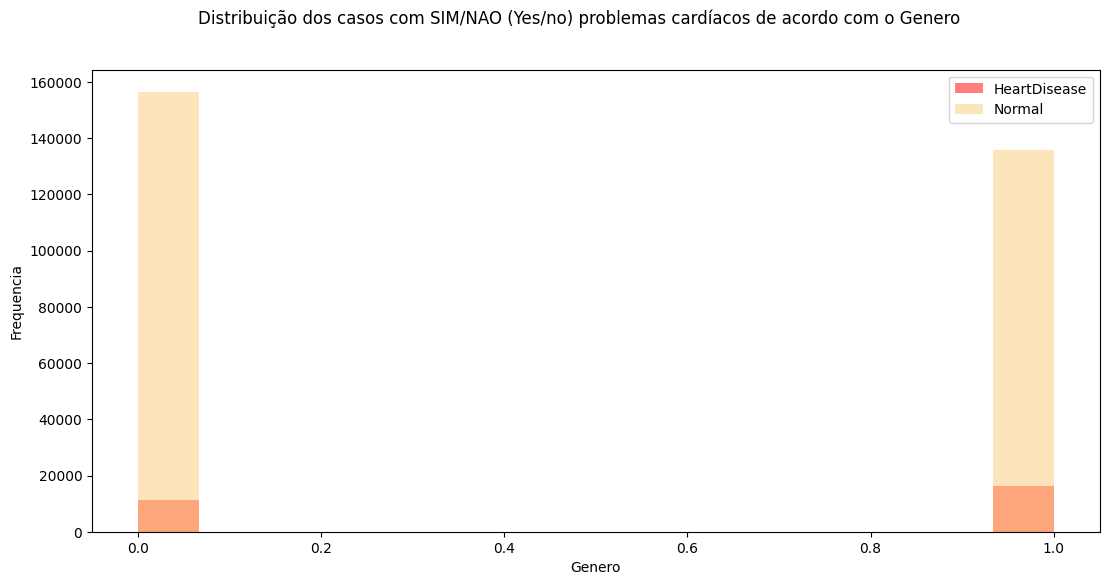

In [5]:
#Análise gráfica
#distribuição de casos por sexo 
#1 para homens, 0 para mulheres
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Genero")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos com SIM/NAO (Yes/no) problemas cardíacos de acordo com o Genero")

ax.legend();

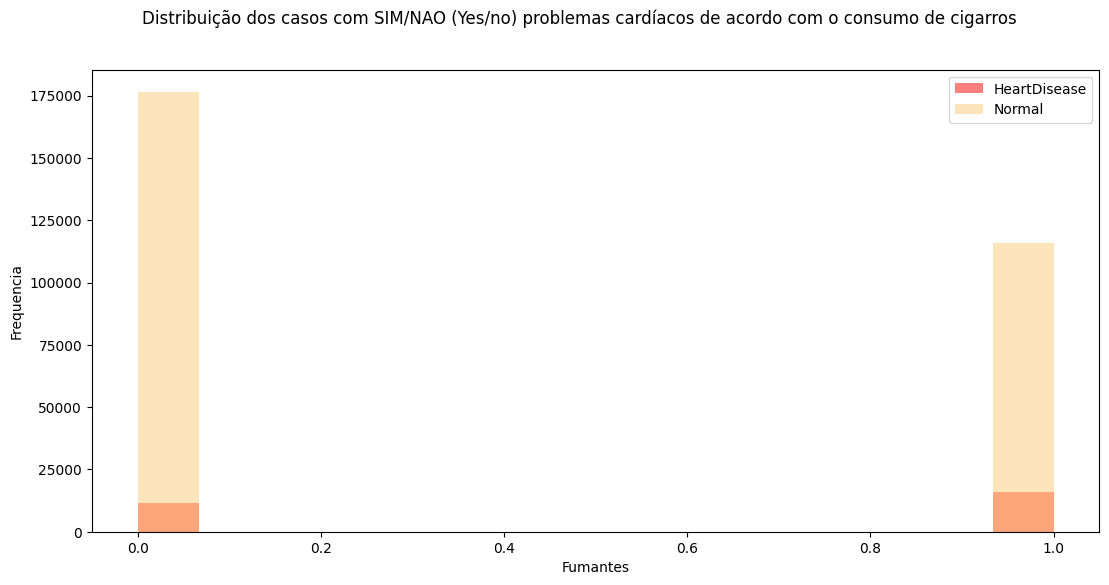

In [6]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Fumantes")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos com SIM/NAO (Yes/no) problemas cardíacos de acordo com o consumo de cigarros")

ax.legend();

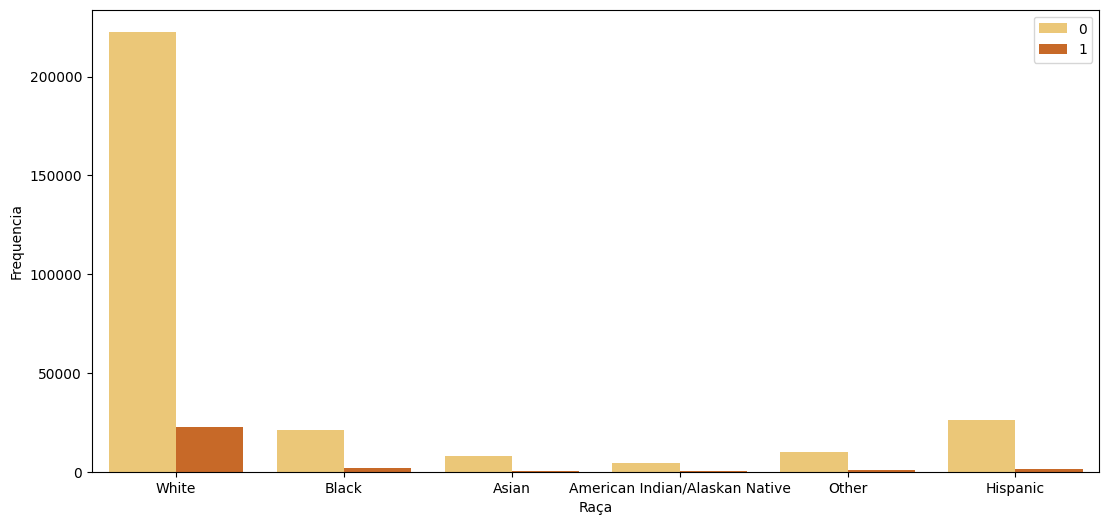

In [7]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Race'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xlabel('Raça')
plt.legend()
plt.ylabel('Frequencia')
plt.show()

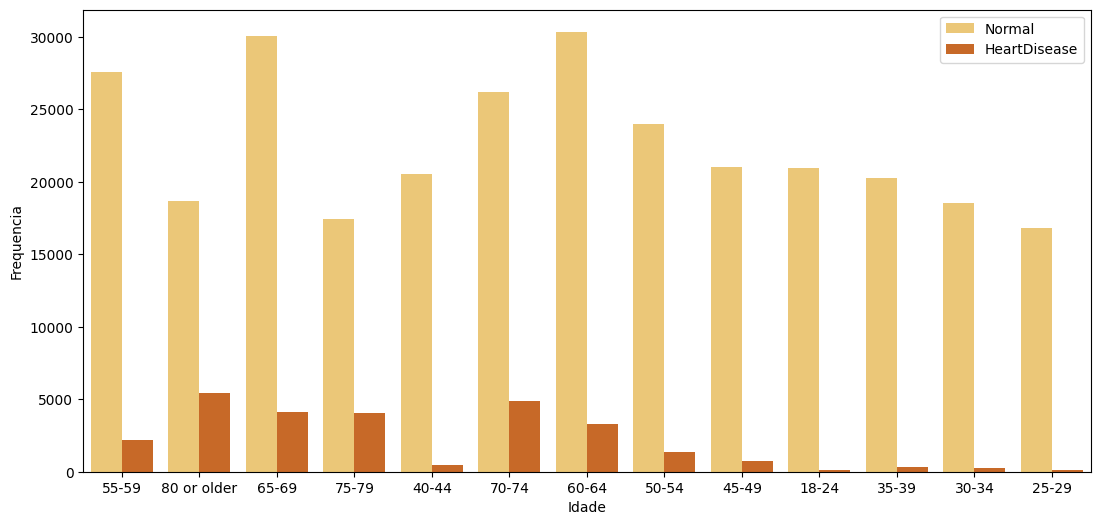

In [8]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
fig.suptitle("Distribuição dos casos com SIM/NAO (Yes/no) problemas cardíacos de acordo com a Idade")
plt.xlabel('Idade')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequencia')
plt.show()

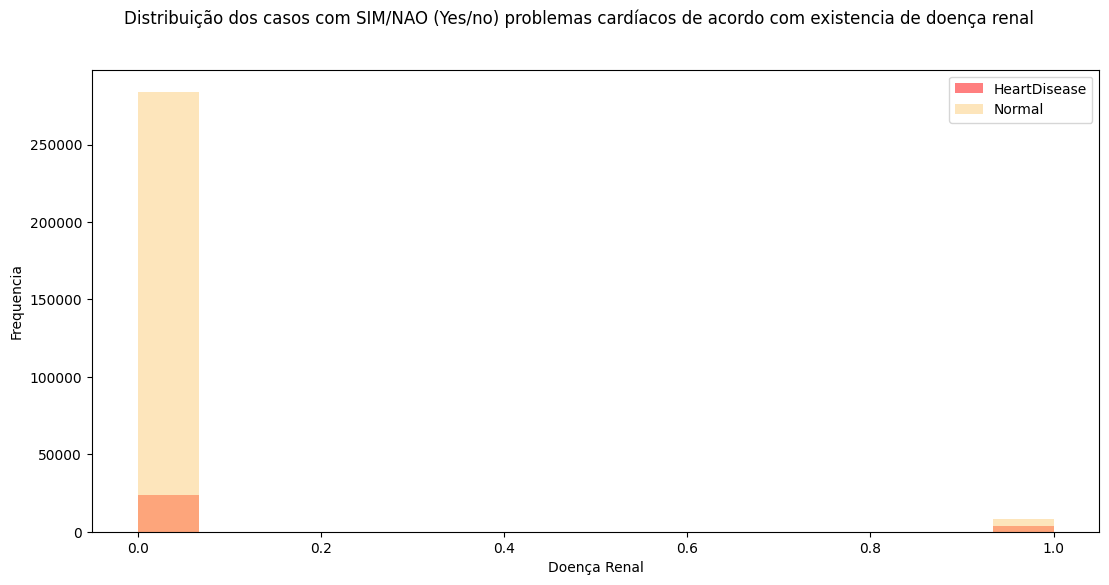

In [9]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Doença Renal")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos com SIM/NAO (Yes/no) problemas cardíacos de acordo com existencia de doença renal")

ax.legend();

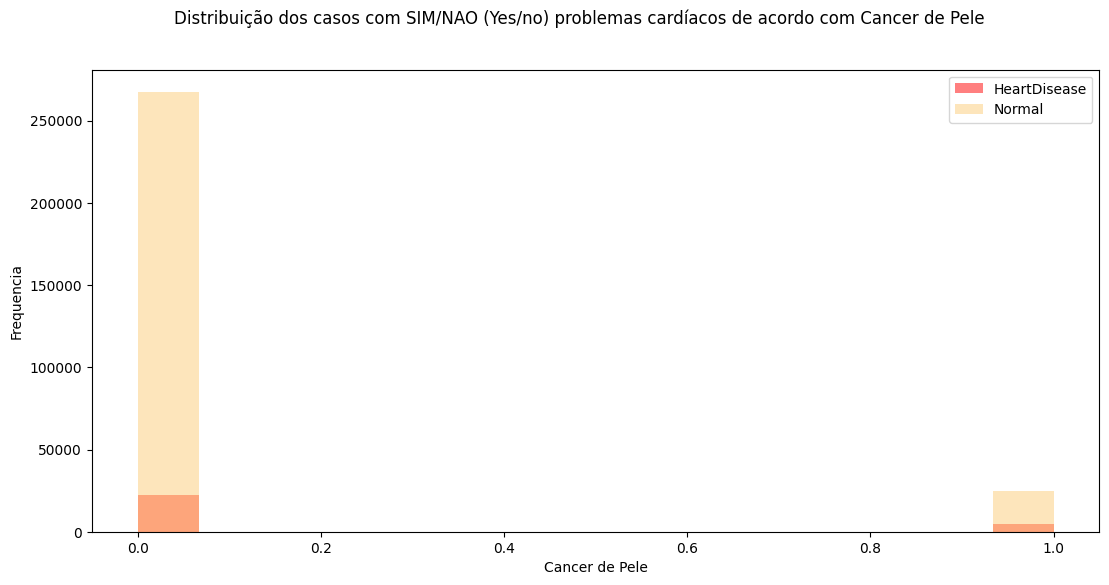

In [10]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Cancer de Pele")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos com SIM/NAO (Yes/no) problemas cardíacos de acordo com Cancer de Pele")

ax.legend();

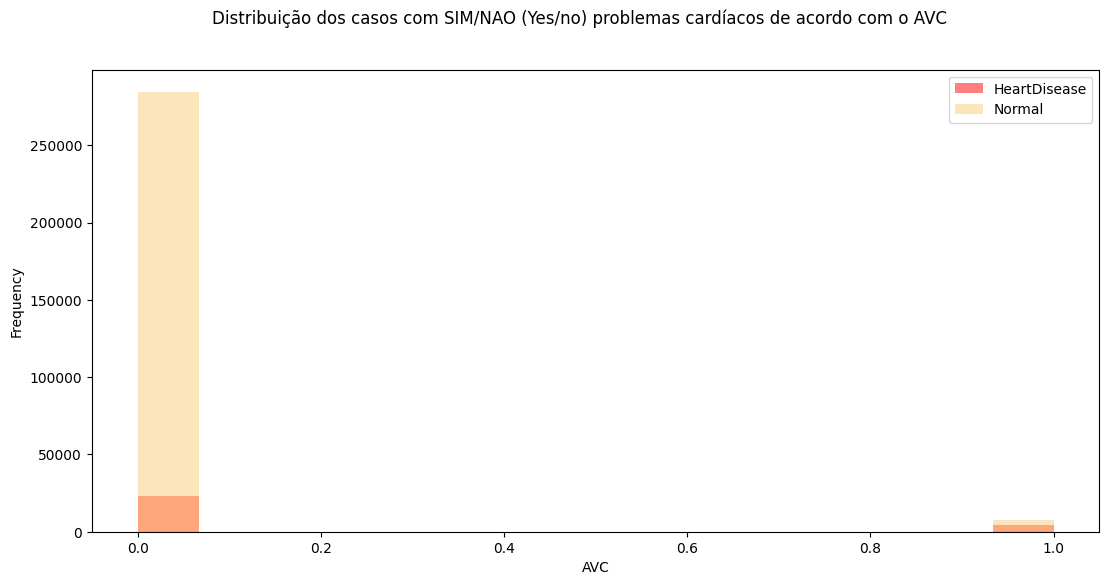

In [11]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("AVC")
ax.set_ylabel("Frequency")

fig.suptitle("Distribuição dos casos com SIM/NAO (Yes/no) problemas cardíacos de acordo com o AVC")

ax.legend();

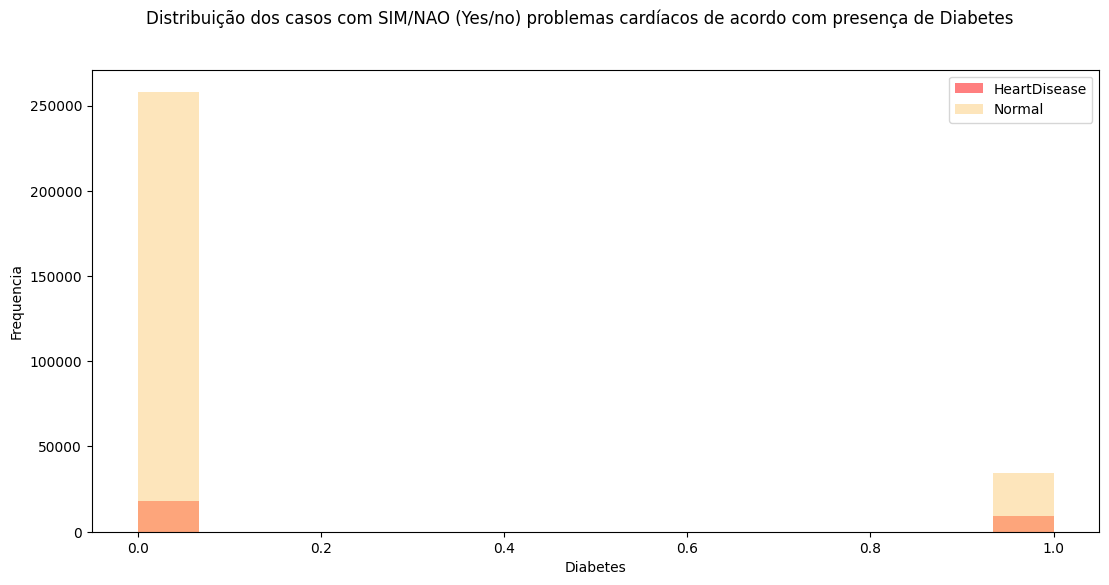

In [12]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetes")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos com SIM/NAO (Yes/no) problemas cardíacos de acordo com presença de Diabetes")

ax.legend();

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8492\1405933809.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<AxesSubplot: >

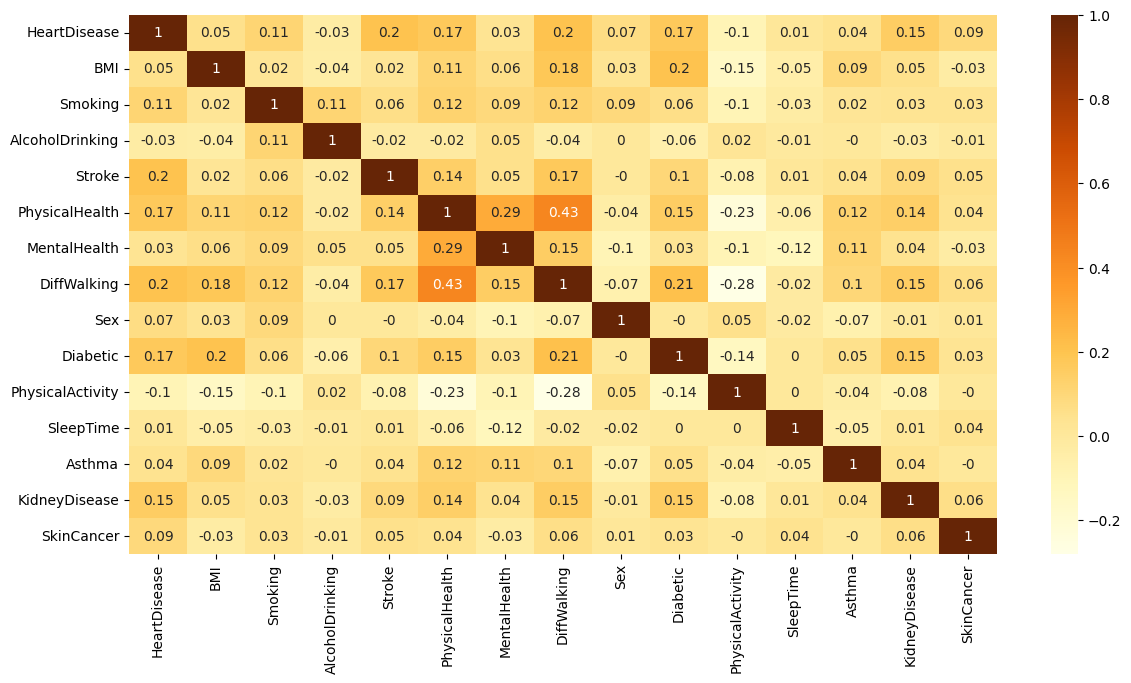

In [13]:
#correlação das variáveis numéricas
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

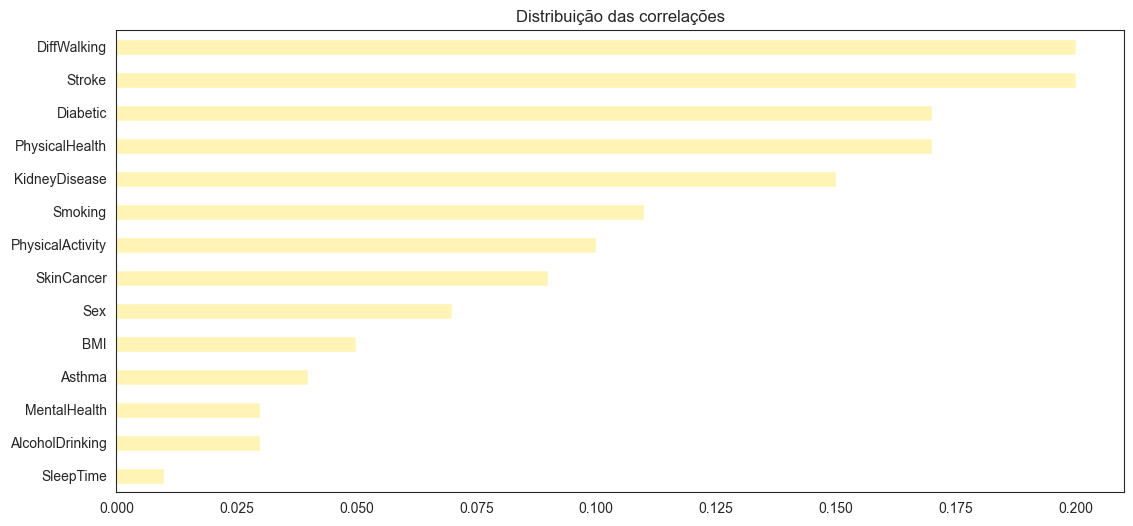

In [14]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribuição das correlações')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8492\2629255770.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8492\2629255770.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


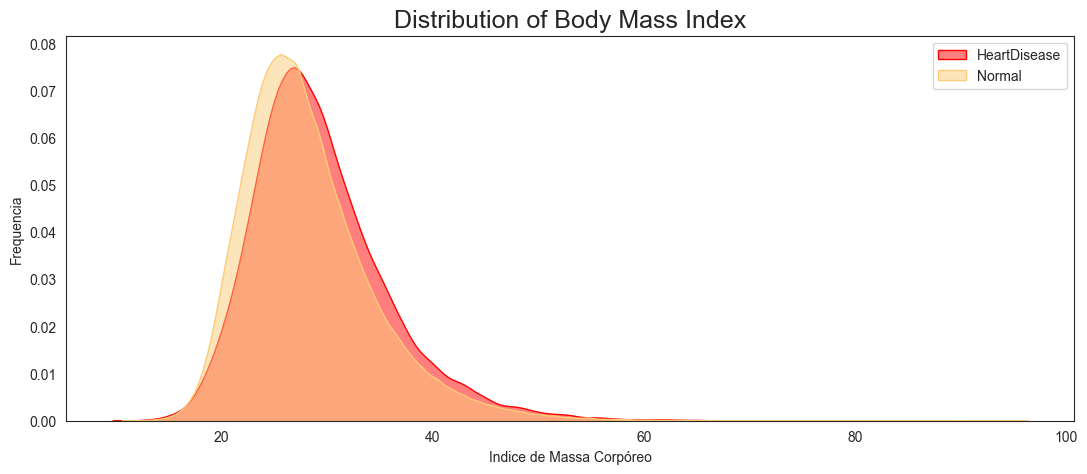

In [15]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("Indice de Massa Corpóreo")
ax.set_ylabel("Frequencia")
ax.legend();
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8492\3396842909.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8492\3396842909.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


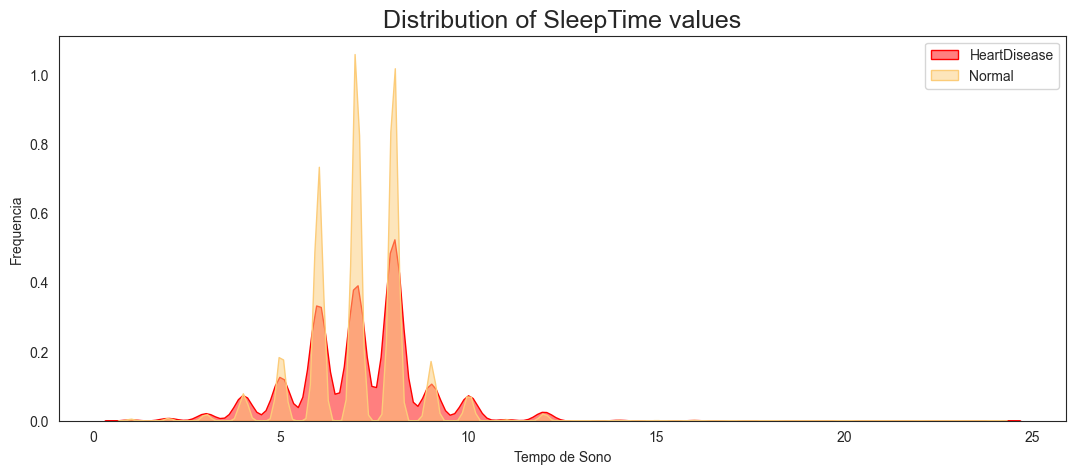

In [16]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("Tempo de Sono")
ax.set_ylabel("Frequencia")
ax.legend();
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8492\1353794662.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8492\1353794662.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


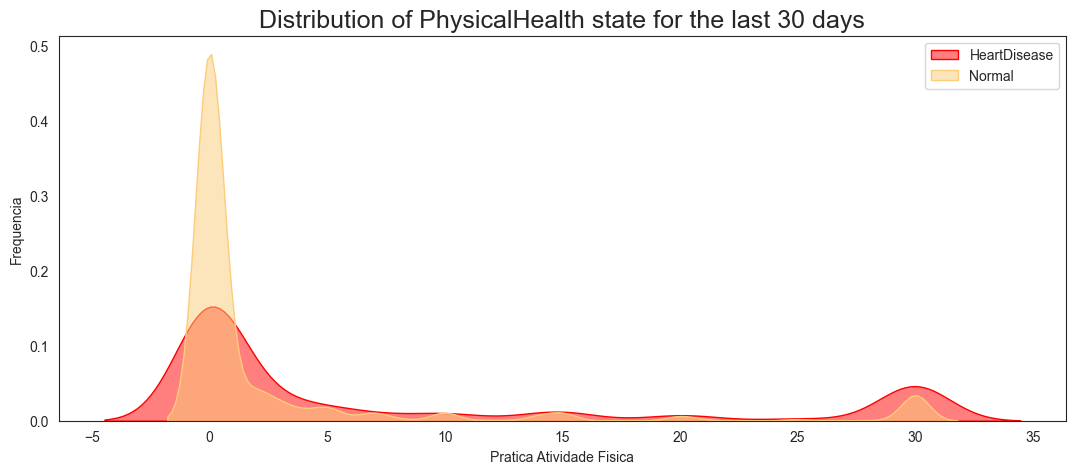

In [17]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("Pratica Atividade Fisica")
ax.set_ylabel("Frequencia")
ax.legend();
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8492\584838310.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8492\584838310.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


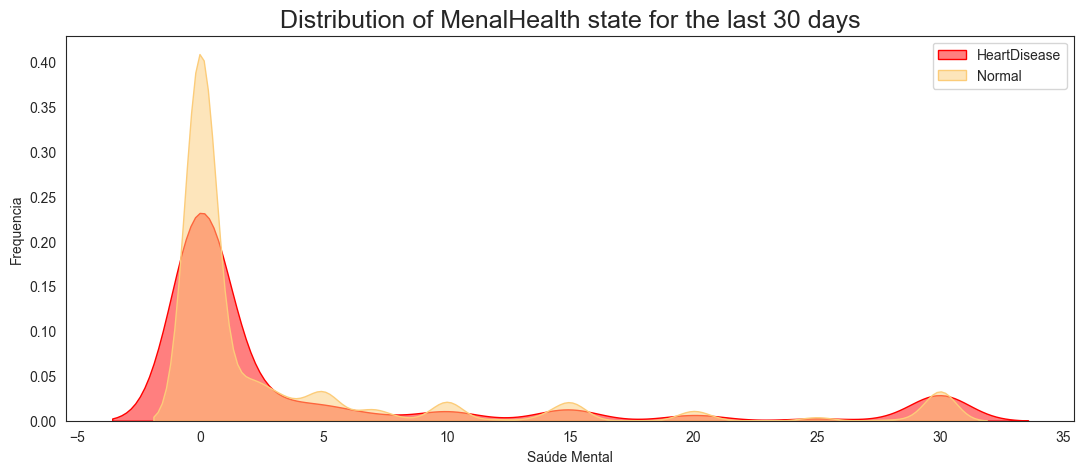

In [18]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of MenalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("Saúde Mental")
ax.set_ylabel("Frequencia")
ax.legend();
plt.show()

In [19]:
#Selecionando atributos
features = df.drop(columns =['HeartDisease'], axis = 1)

#Selecionando variável alvo (teve ou não doença cardíaca)
target = df['HeartDisease']

# Separando treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 17)
Shape of testing feature: (63959, 17)
Shape of training label: (255836,)
Shape of training label: (63959,)


In [20]:
#Aplicando OneHotEncoding para normalizar as variáveis categóricas
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough')

# Encode training data 
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

# Remove old columns
X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)


# Encode test data 
transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)

# Remove old columns
X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
#Fazendo normalização dos dados numéricos com scaler (valores entre 0 e 1)
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)


In [22]:
#Função para calcular métricas de avaliação de desempenho dos modelos
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [23]:
# Construindo um classificador KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9050016416766992
Precision: 0.3570780399274047
Recall: 0.14450973191333089
F1 Score: 0.2057516339869281
Cohens Kappa Score: 0.16477268538693723
Area Under Curve: 0.7190876830488478
Confusion Matrix:
 [[57096  1417]
 [ 4659   787]]


In [24]:
#Construindo uma árvore de decisão
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.8646945699588799
Precision: 0.232220367278798
Recall: 0.25541681968417185
F1 Score: 0.2432668765302553
Cohens Kappa Score: 0.1691567154170338
Area Under Curve: 0.589573855978808
Confusion Matrix:
 [[53914  4599]
 [ 4055  1391]]


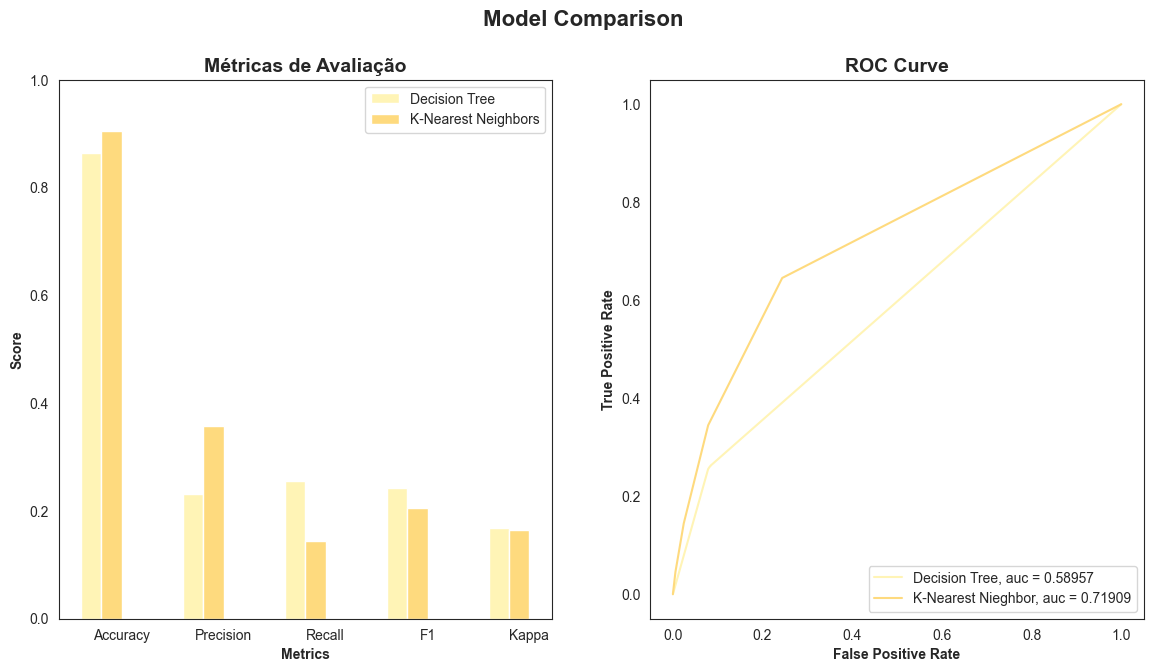

In [25]:
# Comparando o desempenho dos modelos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Métricas de Avaliação', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()